# Setup Environment 

In [1]:
# pip install tensorflow

# Import Library

In [9]:
import pandas as pd
import matplotlib.pyplot as plt  
import os
from os.path import join
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization , Activation,Conv2D
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix
 



# Preprocessing

In [10]:
import pandas as pd

# path_main = 'C:\\Users\\wawn1\\projects_skripsi\\R\\data\\Dataset_original\\'  # Pastikan ada tanda pemisah di akhir direktori
path_main = "../data/data_preprocessing/v1.3/"
file = path_main + "augmented_labels.csv"
df = pd.read_csv(file)
df.head()


,filename,width,height,class,xmin,ymin,xmax,ymax
0,ma_original_ma15-meki-r5-png_57ecc4bd-4a3d-498...,128,128,Ma,11.4,14.2,111.8,110.8
1,ma_original_ma15-meki-r5-png_57ecc4bd-4a3d-498...,128,128,Ma,11.4,14.2,111.8,110.8
2,ma_original_ma15-meki-r5-png_57ecc4bd-4a3d-498...,128,128,Ma,11.4,14.2,111.8,110.8
3,ma_original_ma15-meki-r5-png_57ecc4bd-4a3d-498...,128,128,Ma,11.4,14.2,111.8,110.8
4,ma_original_ma15-meki-r5-png_57ecc4bd-4a3d-498...,128,128,Ma,11.4,14.2,111.8,110.8


Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v1.3\Ha is  650
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v1.3\Ma is  650
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v1.3\Nga is  650
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v1.3\Nya is  650
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v1.3\Ra is  650


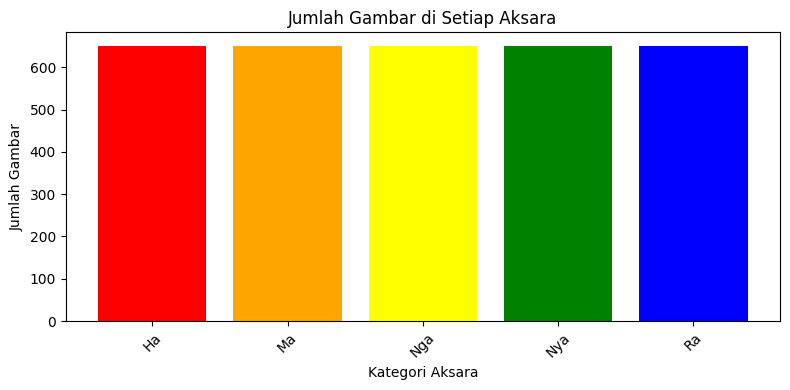

In [11]:
import matplotlib.pyplot as plt
import os
# Define an empty list
file_counts = []
def countFile(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    file_counts.append(num_files)
    print(f"Jumlah File {link} is ", num_files)
    
    
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v1.3\\Ha")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v1.3\\Ma")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v1.3\\Nga")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v1.3\\Nya")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v1.3\\Ra")

# Data
aksara_categories = ['Ha', 'Ma', 'Nga', 'Nya', 'Ra']
colors = ['red', 'orange', 'yellow', 'green', 'blue']

# Create bar chart
plt.figure(figsize=(8, 4))
plt.bar(aksara_categories, file_counts, color=colors)
plt.xlabel('Kategori Aksara')
plt.ylabel('Jumlah Gambar')
plt.title('Jumlah Gambar di Setiap Aksara')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



In [12]:
# import os
# import cv2
# import numpy as np
# from tensorflow.keras.utils import to_categorical
# import matplotlib.pyplot as plt

# # Define the input path and emotions
# INPUT_PATH = path_main  # Ganti dengan path ke data Anda
# EMOTIONS = ['Ha', 'Ma', 'Nga', 'Nya', 'Ra']

# # Define the target image size
# IMAGE_SIZE = (128, 128)

# def create_image_generator(input_path, emotions, image_size):
#     for index, emotion in enumerate(emotions):
#         emotion_path = os.path.join(input_path, emotion)
#         for filename in os.listdir(emotion_path):
#             image_path = os.path.join(emotion_path, filename)
#             image = cv2.imread(image_path)
            
#             # Pastikan gambar berwarna dikonversi menjadi grayscale
#             if len(image.shape) > 2 and image.shape[2] == 3:
#                 image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
#             image = cv2.resize(image, image_size)  # Resize image
            
#             # Normalization
#             image = image.astype('float32') / 255.0
            
#             # Apply CLAHE filter
#             image_filtered = apply_clahe_filter(image)
            
#             yield image, image_filtered, index

# def load_images(input_path, emotions, image_size):
#     X, y = [], []
#     for _, image_filtered, label in create_image_generator(input_path, emotions, image_size):
#         X.append(image_filtered)
#         y.append(label)
#     X = np.array(X)
#     y = to_categorical(np.array(y))
#     return X, y

# def apply_clahe_filter(image, clip_limit=2.0, tile_size=(8, 8)):
#     # Pastikan gambar adalah grayscale dengan tipe data uint8
#     if image.dtype != np.uint8:
#         image = (image * 255).astype(np.uint8)
    
#     # Create CLAHE object
#     clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_size)
    
#     # Apply CLAHE
#     filtered_image = clahe.apply(image)
#     return filtered_image

# # Load images with CLAHE filter applied
# X, y = load_images(INPUT_PATH, EMOTIONS, IMAGE_SIZE)
# input_shape = (128, 128, 1)

# # Select one image to display
# index_to_display = 0

# # Generate a sample to check the preprocessing
# generator = create_image_generator(INPUT_PATH, EMOTIONS, IMAGE_SIZE)
# original_image, filtered_image, _ = next(generator)

# # Display the original and filtered images
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.imshow(original_image)
# plt.title("Original Image")

# plt.subplot(1, 2, 2)
# plt.imshow(filtered_image)
# plt.title("Filtered Image with CLAHE")

# plt.show()


In [13]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the input path and aksaraJowo
INPUT_PATH = path_main  # Ganti dengan path ke data Anda
AKSARA = aksara_categories

# Define the target image size
IMAGE_SIZE = (128, 128)

def create_image_generator(input_path, aksaraJowo, image_size):
    for index, jowo in enumerate(aksaraJowo):
        aksara_path = os.path.join(input_path, jowo)
        
        for filename in os.listdir(aksara_path):
            image_path = os.path.join(aksara_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar sebagai grayscale
            original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)  # Simpan gambar asli
            grayscale_image = image.copy()  # Simpan gambar grayscale
            image = cv2.resize(image, image_size)  # Resize image
            # Normalisasi tidak diperlukan karena gambar sudah dalam skala 0-255
            image_filtered = apply_log_and_threshold(image)
            
            yield original_image, grayscale_image, image_filtered, index


def load_images(input_path, aksaraJowo, image_size):
    X_original, X_grayscale, X_filtered, y_label = [], [], [], []
    
    for original_image, grayscale_image, image_filtered, label in create_image_generator(input_path, aksaraJowo, image_size):
        X_original.append(original_image)
        X_grayscale.append(grayscale_image)
        X_filtered.append(image_filtered)
        y_label.append(label)
        
    X_original = np.array(X_original)
    X_grayscale = np.array(X_grayscale)
    X_filtered = np.array(X_filtered)
    y_label = to_categorical(np.array(y_label))
    
    return X_original, X_grayscale, X_filtered, y_label

def apply_log_and_threshold(image, kernel_size=15, sigma=1.0, log_threshold=5):
    # Apply Gaussian Blur
    image_gaussian = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    
    # Apply Laplacian of Gaussian (LoG)
    edges_log = cv2.Laplacian(image_gaussian, cv2.CV_64F, ksize=3)
    
    # Thresholding for Edge Detection Results
    detected_edges_log = np.zeros_like(edges_log)
    detected_edges_log[edges_log > log_threshold] = 255
    
    return detected_edges_log

# Load images with LoG filter and thresholding applied
X_original, X_grayscale, X_filtered, y_label = load_images(INPUT_PATH, AKSARA, IMAGE_SIZE)
input_shape = (128, 128, 1)

# Select one image to display
index_to_display = 0

# Display the original image, grayscale image, and filtered image
original_image = X_original[index_to_display]
grayscale_image = X_grayscale[index_to_display]
filtered_image = X_filtered[index_to_display]


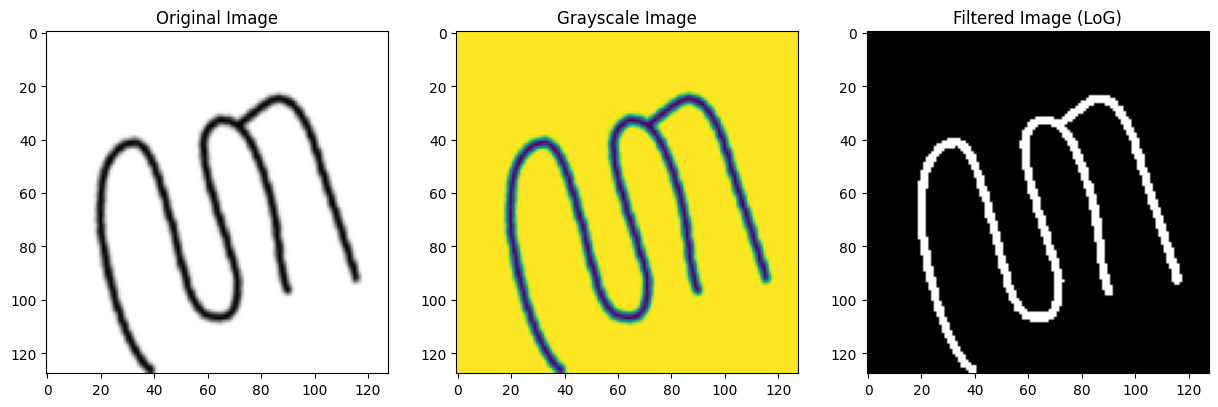

In [14]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))  # Konversi BGR ke RGB untuk tampilan yang benar

plt.subplot(1, 3, 2)
plt.title('Grayscale Image')
# plt.imshow(grayscale_image, cmap='gray')
plt.imshow(grayscale_image)

plt.subplot(1, 3, 3)
# plt.subplot(1, 3, 2)
plt.title('Filtered Image (LoG)')
plt.imshow(filtered_image, cmap='gray')

plt.show()

In [15]:
print(f"Bentuk input pada gambar: {IMAGE_SIZE}")


Bentuk input pada gambar: (128, 128)


In [16]:
# Reshape X_filtered
X_filtered_reshaped = X_filtered.reshape(-1, 128, 128, 1)
print("X_filtered shape after reshape:", X_filtered_reshaped.shape)

X_filtered shape after reshape: (3250, 128, 128, 1)


In [17]:
# Train test split 
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_filtered_reshaped, y_label, test_size=0.3, random_state=150)

In [18]:
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (2275, 128, 128, 1)
x_test shape (975, 128, 128, 1)
y_train shape (2275, 5)
y_test shape (975, 5)


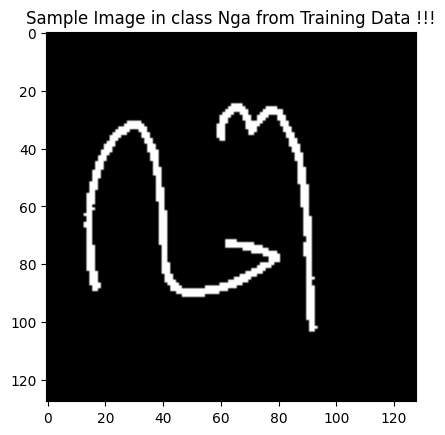

In [19]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_train[0], cmap='gray')
plt.title("Sample Image in class {} from Training Data !!!".format(AKSARA[np.argmax(y_train[0])]))
plt.axis('on')
plt.show()


# Build the Model

## Model 1

In [31]:
import tensorflow as tf

from tensorflow.keras.applications import VGG16

# Load pre-trained VGG16 model
vgg16 = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(128, 128, 3),
    pooling="max",
    classes=5,
    classifier_activation="softmax"
)

# Freeze VGG16 layers
for layer in vgg16.layers:
    layer.trainable = False

vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_1          │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [33]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import layers, initializers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

# Initialize Sequential model
model = Sequential()

# Add VGG16 as a layer
model.add(vgg16)

model = models.Sequential()

# Block 1
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001), input_shape=input_shape))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Dropout(0.75))

# Block 2
# model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.75))

# Block 3
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.75))

# Block 4
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.75))

# Block 5
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.75))

# Flatten
model.add(Flatten())

# Dense layers
# model.add(Dense(256, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.0001, seed=None)))
model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.75))

# model.add(Dense(128, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.0001, seed=None)))
model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.75))

# Output layer
model.add(Dense(5, activation='softmax'))

# Adam optimizer with learning rate scheduling, Weight Decay, and Gradient Clipping
# opt = Adam(learning_rate=0.0001, weight_decay=1e-4, clipvalue=0.0001)
opt = tf.keras.optimizers.SGD(learning_rate=0.0001)
    
# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 42, 42, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 42, 42, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 42, 42, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 42, 42, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 42, 42, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 21, 21, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 21, 21, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 10, 10, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 10, 10, 256)    │         1,02

 Total params: 8,378,725 (31.96 MB)

 Trainable params: 8,372,965 (31.94 MB)

 Non-trainable params: 5,760 (22.50 KB)

In [34]:
history_v1 = model.fit(X_train, y_train, batch_size=64, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 764s 20s/step - accuracy: 0.3070 - loss: 2.2338 - val_accuracy: 0.1508 - val_loss: 1.6130
Epoch 2/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 628s 17s/step - accuracy: 0.7891 - loss: 0.6586 - val_accuracy: 0.2482 - val_loss: 1.6263
Epoch 3/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 629s 16s/step - accuracy: 0.9525 - loss: 0.3207 - val_accuracy: 0.2533 - val_loss: 1.6689
Epoch 4/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 632s 16s/step - accuracy: 0.9860 - loss: 0.1931 - val_accuracy: 0.2523 - val_loss: 1.7142
Epoch 5/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 570s 16s/step - accuracy: 0.9981 - loss: 0.1253 - val_accuracy: 0.2308 - val_loss: 1.6901
Epoch 6/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 581s 16s/step - accuracy: 0.9985 - loss: 0.1013 - val_accuracy: 0.2379 - val_loss: 1.5411
Epoch 7/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 718s 19s/step - accuracy: 1.0000 - loss: 0.0824 - val_accuracy: 0.3313 - val_loss: 1.2762
Epoch 8/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 696s 19s/step - accuracy: 1.0000 - loss: 0.0646 - val_accuracy: 0.

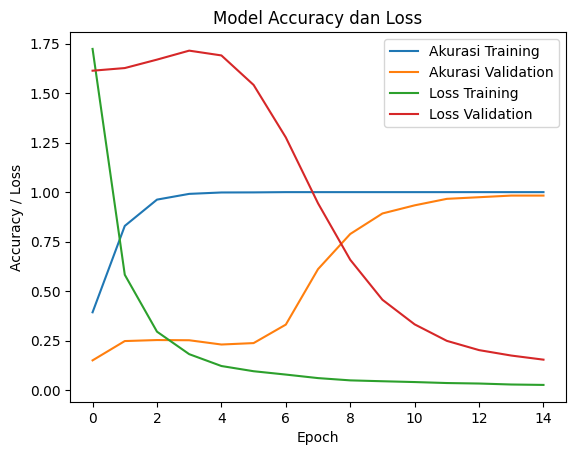

In [35]:
import matplotlib.pyplot as plt

# Plot akurasi training dan validation
plt.plot(history_v1.history["accuracy"], label="Akurasi Training")
plt.plot(history_v1.history["val_accuracy"], label="Akurasi Validation")

# Plot loss training dan validation
plt.plot(history_v1.history["loss"], label="Loss Training")
plt.plot(history_v1.history["val_loss"], label="Loss Validation")

# Label dan judul plot
plt.title("Model Accuracy dan Loss")
plt.xlabel("Epoch")
plt.ylabel("Accuracy / Loss")
plt.legend()

# Tampilkan plot
plt.show()


In [36]:
# pd.DataFrame(history_v1.history).plot()

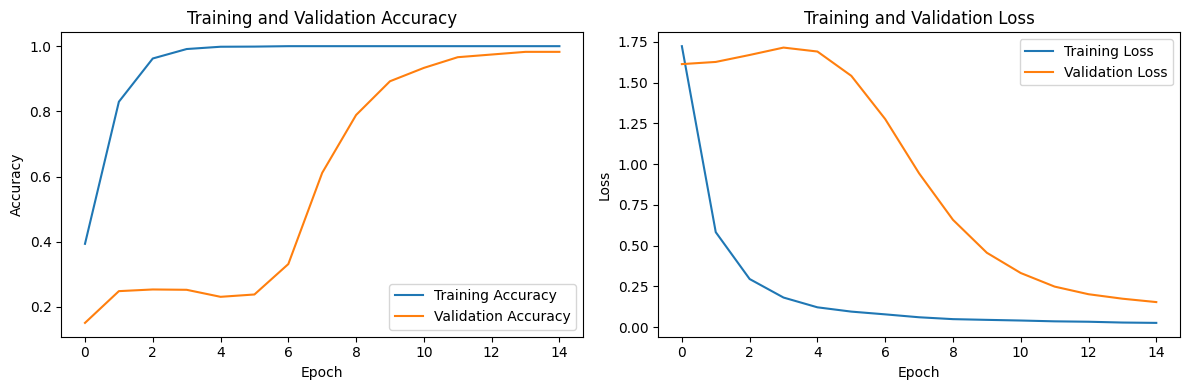

In [37]:
# Menampilkan grafik training dan validation accuracy
import matplotlib.pyplot as plt

acc = history_v1.history['accuracy']
val_acc = history_v1.history['val_accuracy']

loss = history_v1.history['loss']

val_loss = history_v1.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [38]:
# Evaluasi model menggunakan data uji
loss, acc = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", acc)

31/31 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - accuracy: 0.9766 - loss: 0.1669
Loss: 0.15433135628700256
Accuracy: 0.9825640916824341


In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung dan tampilkan classification report
report = metrics.classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
print("Recall:", recall)

# F1-score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print("F1-score:", f1)

# Log Loss
logloss = log_loss(y_test, y_pred)
print("Log Loss:", logloss)

31/31 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step
              precision    recall  f1-score   support

          Ha       0.96      0.98      0.97       189
          Ma       1.00      0.95      0.98       196
         Nga       0.96      0.98      0.97       203
         Nya       0.99      1.00      1.00       199
          Ra       0.99      1.00      1.00       188

    accuracy                           0.98       975
   macro avg       0.98      0.98      0.98       975
weighted avg       0.98      0.98      0.98       975

Accuracy: 0.9825641025641025
Precision: 0.9828429472614022
Recall: 0.9825641025641025
F1-score: 0.9825608908205219
Log Loss: 0.15433136107187828


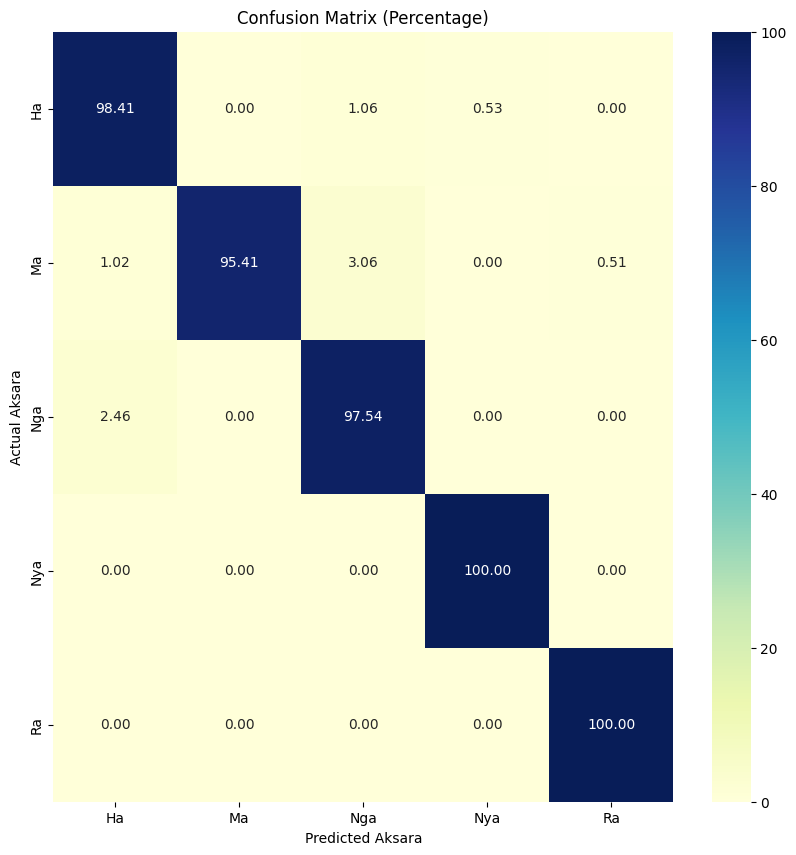

In [45]:
# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Hitung total sampel untuk setiap kelas aktual
total_per_class = np.sum(cm, axis=1)

# Konversi setiap elemen dalam confusion matrix menjadi persentase
cm_percent = (cm.astype('float') / total_per_class[:, np.newaxis]) * 100

# Display Confusion Matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

In [51]:
# # ROC curve and ROC AUC for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(len(AKSARA)):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Micro-average ROC curve and ROC AUC
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# # Plot ROC curves for each class and the micro-average ROC curve
# plt.figure(figsize=(10, 8))
# lw = 2
# plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
#          label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
# colors = ['aqua', 'darkorange', 'cornflowerblue', 'navy', 'purple', 'red', 'green', 'brown']
# for i, color in zip(range(len(AKSARA)), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (area = {1:0.2f})'.format(AKSARA[i], roc_auc[i]))
    
# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()

In [57]:
from keras.models import load_model

# Simpan model ke dalam variabel
saved_model_path = "../save_models/aksarajawa_v0.0.keras"
model.save(saved_model_path)

In [63]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import cv2

# Load the pre-trained model
loaded_model = load_model(saved_model_path)

# Load the grayscale image
test_image_path1 = "../data/data_original/Pengenalan Aksara Jawa-tensorflow/test/ha_original_ha20-mine3-png_aabeaada-201a-48cb-87fc-c193883dbfb7_png.rf.19660ea697a2c0f2b2949d2ee35f9dd8.jpg"
img = image.load_img(test_image_path1, color_mode='grayscale', target_size=(128, 128))

# Convert the image to array
img_array = image.img_to_array(img)

# Expand the dimensions to match the input shape of the model
img_array = np.expand_dims(img_array, axis=0)

# Preprocessing: Apply LoG filter
def apply_log_and_threshold(image, kernel_size=15, sigma=1.0, log_threshold=5):
    # Apply Gaussian Blur
    image_gaussian = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    
    # Convert the blurred image to the appropriate format for Laplacian filter
    image_gaussian = cv2.convertScaleAbs(image_gaussian)
    
    # Apply Laplacian of Gaussian (LoG)
    edges_log = cv2.Laplacian(image_gaussian, cv2.CV_64F, ksize=3)
    
    # Thresholding for Edge Detection Results
    detected_edges_log = np.zeros_like(edges_log)
    detected_edges_log[edges_log > log_threshold] = 255
    
    return detected_edges_log


# Apply LoG filter to the image array
img_array_filtered = apply_log_and_threshold(img_array[0, :, :, 0])

# Expand the dimensions again to match the input shape of the model
img_array_filtered = np.expand_dims(img_array_filtered, axis=-1)
img_array_filtered = np.expand_dims(img_array_filtered, axis=0)

# Perform the prediction
predictions = loaded_model.predict(img_array_filtered)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)
class_labels = aksara_categories
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted class: Ha


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Predicted class: Nga


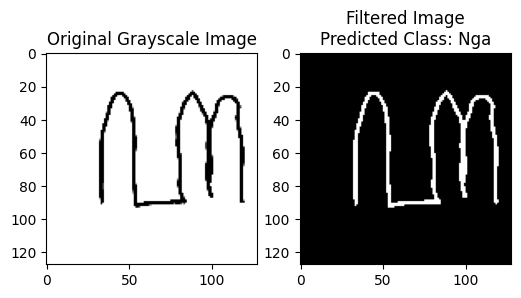

In [72]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the pre-trained model
# saved_model_path = 'path_to_your_saved_model.h5'  # Ganti dengan path ke model yang disimpan
loaded_model = load_model(saved_model_path)

# Load the grayscale image
test_image_path1 = "../data/data_original/javaneseScript_byPhiard/prediction/ha0.png"
img = image.load_img(test_image_path1, color_mode='grayscale', target_size=(128, 128))

# Convert the image to array
img_array = image.img_to_array(img)

# Expand the dimensions to match the input shape of the model
img_array = np.expand_dims(img_array, axis=0)

# Preprocessing: Apply LoG filter
def apply_log_and_threshold(image, kernel_size=15, sigma=1.0, log_threshold=5):
    # Apply Gaussian Blur
    image_gaussian = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    
    # Convert the blurred image to the appropriate format for Laplacian filter
    image_gaussian = cv2.convertScaleAbs(image_gaussian)
    
    # Apply Laplacian of Gaussian (LoG)
    edges_log = cv2.Laplacian(image_gaussian, cv2.CV_64F, ksize=3)
    
    # Thresholding for Edge Detection Results
    detected_edges_log = np.zeros_like(edges_log)
    detected_edges_log[edges_log > log_threshold] = 255
    
    return detected_edges_log

# Apply LoG filter to the image array
img_array_filtered = apply_log_and_threshold(img_array[0, :, :, 0])

# Expand the dimensions again to match the input shape of the model
img_array_filtered = np.expand_dims(img_array_filtered, axis=-1)
img_array_filtered = np.expand_dims(img_array_filtered, axis=0)

# Perform the prediction
predictions = loaded_model.predict(img_array_filtered)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)
class_labels = aksara_categories  # Pastikan aksara_categories sudah didefinisikan sebelumnya
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

# Display the image with the predicted class
plt.figure(figsize=(6, 6))

# Plot the original grayscale image
plt.subplot(1, 2, 1)
plt.imshow(img_array[0, :, :, 0], cmap='gray')
plt.title("Original Grayscale Image")

# Plot the filtered image
plt.subplot(1, 2, 2)
# plt.imshow(img_array_filtered[0, :, :, 0], cmap='gray')
plt.imshow(img_array_filtered[0, :, :, 0], cmap='gray')
plt.title(f"Filtered Image\nPredicted Class: {predicted_class_name}")

plt.show()

In [78]:
# pip install ipywidgets

   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/139.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/139.4 kB ? eta -:--:--
   ----------- --------------------------- 41.0/139.4 kB 131.3 kB/s eta 0:00:01
   ----------- --------------------------- 41.0/139.4 kB 131.3 kB/s eta 0:00:01
   -------------------- ------------------ 71.7/139.4 kB 151.3 kB/s eta 0:00:01
   -------------------- ------------------ 71.7/139.4 kB 151.3 kB/s eta 0:00:01
   -------------------- ------------------ 71.7/139.4 kB 151.3 kB/s eta 0:00:01
   ------------------------- ------------- 92.2/139.4 kB 141.7 kB/s eta 0:00:01
   ------------------------------ ------- 112.6/139.4 kB 163.8 kB/s eta 0:00:01
   ------------------------------ ------- 112.6/139.4 kB 163.8 kB/s eta 0:00:01
   ------------------------------ ------- 112.6/139.4 kB 163.8 kB/s eta 0:

In [ ]:
# import numpy as np
# import cv2
# from keras.models import load_model
# from keras.preprocessing import image
# import matplotlib.pyplot as plt
# from IPython.display import display
# import ipywidgets as widgets
# from io import BytesIO

# # Define aksara categories
# # aksara_categories = ['Ha', 'Na', 'Ca', 'Ra', 'Ka']  # Ganti dengan kategori aksara Anda

# # Load the pre-trained model
# # saved_model_path = 'path_to_your_saved_model.h5'  # Ganti dengan path ke model yang disimpan
# loaded_model = load_model(saved_model_path)

# # Preprocessing: Apply LoG filter
# def apply_log_and_threshold(image, kernel_size=15, sigma=1.0, log_threshold=5):
#     # Apply Gaussian Blur
#     image_gaussian = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    
#     # Convert the blurred image to the appropriate format for Laplacian filter
#     image_gaussian = cv2.convertScaleAbs(image_gaussian)
    
#     # Apply Laplacian of Gaussian (LoG)
#     edges_log = cv2.Laplacian(image_gaussian, cv2.CV_64F, ksize=3)
    
#     # Thresholding for Edge Detection Results
#     detected_edges_log = np.zeros_like(edges_log)
#     detected_edges_log[edges_log > log_threshold] = 255
    
#     return detected_edges_log

# # Function to handle image upload
# def on_upload_change(change):
#     # Clear previous outputs
#     plt.clf()
    
#     # Get uploaded file content
#     file_content = change['new'][0]['content']
    
#     # Load the uploaded image
#     img = image.load_img(BytesIO(file_content), color_mode='grayscale', target_size=(128, 128))
    
#     # Convert the image to array
#     img_array = image.img_to_array(img)
    
#     # Expand the dimensions to match the input shape of the model
#     img_array = np.expand_dims(img_array, axis=0)
    
#     # Apply LoG filter to the image array
#     img_array_filtered = apply_log_and_threshold(img_array[0, :, :, 0])
    
#     # Expand the dimensions again to match the input shape of the model
#     img_array_filtered = np.expand_dims(img_array_filtered, axis=-1)
#     img_array_filtered = np.expand_dims(img_array_filtered, axis=0)
    
#     # Perform the prediction
#     predictions = loaded_model.predict(img_array_filtered)
    
#     # Get the predicted class index
#     predicted_class_index = np.argmax(predictions)
#     predicted_class_name = aksara_categories[predicted_class_index]
    
#     # Print the result
#     print("Predicted class:", predicted_class_name)
    
#     # Display the image with the predicted class
#     plt.figure(figsize=(6, 6))
    
#     # Plot the original grayscale image
#     plt.subplot(1, 2, 1)
#     plt.imshow(img_array[0, :, :, 0], cmap='gray')
#     plt.title("Original Grayscale Image")
    
#     # Plot the filtered image
#     plt.subplot(1, 2, 2)
#     plt.imshow(img_array_filtered[0, :, :, 0], cmap='gray')
#     plt.title(f"Filtered Image\nPredicted Class: {predicted_class_name}")
    
#     plt.show()

# # Create file upload widget
# upload_widget = widgets.FileUpload(
#     accept='image/*',  # Accept only image files
#     multiple=False  # Accept single file upload
# )

# # Attach the handler to the widget
# upload_widget.observe(on_upload_change, names='value')

# # Display the upload widget
# display(upload_widget)

## Model 2

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.utils import plot_model

# from tensorflow.keras.applications import VGG16

# vgg16 = tf.keras.applications.VGG16(
#     input_shape=(128, 128, 3),
#     pooling=max,
#     include_top=False,
#     weights="imagenet")
# vgg16.summary()

In [ ]:
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.constraints import max_norm
# from tensorflow.keras import layers, initializers, models
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

# model = Sequential()
# model.add(vgg16)
# model = models.Sequential()

# # Block 1
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001), input_shape=input_shape))
# model.add(BatchNormalization())
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Dropout(0.75))

# # Block 2
# model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
# model.add(BatchNormalization())
# model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.75))

# # Block 3
# # model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
# # model.add(BatchNormalization())
# # model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
# # model.add(BatchNormalization())
# # model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
# # model.add(BatchNormalization())
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.75))

# # Block 4
# # model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
# # model.add(BatchNormalization())
# # model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
# # model.add(BatchNormalization())
# # model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
# # model.add(BatchNormalization())
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.75))

# # Block 5
# # model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
# # model.add(BatchNormalization())
# # model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
# # model.add(BatchNormalization())
# # model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
# # model.add(BatchNormalization())
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.75))

# # Flatten
# model.add(Flatten())

# # Dense layers
# model.add(Dense(256, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.0001, seed=None)))
# model.add(BatchNormalization())
# model.add(Dropout(0.75))

# # model.add(Dense(128, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.0001, seed=None)))
# # model.add(BatchNormalization())
# # model.add(Dropout(0.75))

# # Output layer
# model.add(Dense(5, activation='softmax'))

# # Adam optimizer with learning rate scheduling, Weight Decay, and Gradient Clipping
# opt = Adam(learning_rate=0.0001, weight_decay=1e-4, clipvalue=0.0001)
    
# # Compile the model
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# # Model summary
# model.summary()

In [ ]:
# history_v2 = model.fit(X_train, 
#                        y_train, 
#                        batch_size=64, 
#                        epochs=10) 
#                     #    validation_data=(X_test, y_test))

In [ ]:
# import matplotlib.pyplot as plt

# # Plot akurasi training dan validation
# plt.plot(history_v1.history["accuracy"], label="Akurasi Training")
# plt.plot(history_v1.history["val_accuracy"], label="Akurasi Validation")

# # Plot loss training dan validation
# plt.plot(history_v1.history["loss"], label="Loss Training")
# plt.plot(history_v1.history["val_loss"], label="Loss Validation")

# # Label dan judul plot
# plt.title("Model Accuracy dan Loss")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy / Loss")
# plt.legend()

# # Tampilkan plot
# plt.show()

In [ ]:
# ## calculates the false positive rate, true positive rate, and AUC score

# from sklearn.metrics import roc_curve, auc, roc_auc_score
# import matplotlib.pyplot as plt

# # Make predictions
# y_pred = model.predict(X_test)

# # Compute ROC curve and ROC AUC for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(7):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC AUC score
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
# roc_auc["micro"] = roc_auc_score(y_test, y_pred, multi_class='ovr')

# # Plot the ROC curves for each class and the micro-average ROC curve
# plt.figure(figsize=(8, 6))
# lw = 2
# plt.plot(fpr["micro"], tpr["micro"], lw=lw, label='micro-average ROC curve (AUC = {0:0.2f})'
#                                                    ''.format(roc_auc["micro"]))
# colors = ['cornflowerblue', 'darkorange', 'forestgreen', 'red', 'purple', 'gray', 'black', 'pink']
# for i, color in zip(range(7), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of {0} (AUC = {1:0.2f})'.format(EMOTIONS[i], roc_auc[i]))
    
# plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate', fontsize=14)
# plt.ylabel('True Positive Rate', fontsize=14)
# plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
# plt.legend(loc="lower right", fontsize=12)
# plt.show()

In [ ]:
# y_test_int = np.argmax(y_test, axis=1)
# y_pred = model.predict(X_test)
# y_pred_int = np.argmax(y_pred, axis=1)

# print(classification_report(y_test_int, y_pred_int))

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# plt.figure(figsize=(10, 10))
# cm = confusion_matrix(y_test_int, y_pred_int)

# # Hitung total sampel untuk setiap kelas aktual
# total_per_class = np.sum(cm, axis=1)

# # Konversi setiap elemen dalam confusion matrix menjadi persentase
# cm_percent = (cm.astype('float') / total_per_class[:, np.newaxis]) * 100

# # Gunakan label langsung dari variabel EMOTIONS
# emotions_labels = EMOTIONS

# sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=emotions_labels, yticklabels=emotions_labels)
# plt.xlabel("Predicted Emotions")
# plt.ylabel("Actual Emotions")
# plt.title("Confusion Matrix (Percentage)")
# plt.show()


In [ ]:
# # save the model
# model.save('C:\\Users\\USER-03\\W\\R\\ModelMedian.h5')